Household Electricity Consumption" dataset from Azure Open Datasets for time series forecasting

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from statsmodels.tsa.arima.model import ARIMA

Load the dataset

In [18]:
df = pd.read_csv(r"C:\Users\Jibrin\Documents\Abubakar\Data1\energy.csv")
df.head()

,timestamp,load,temp
0,2012-01-01 00:00:00,2698.0,32.000000
1,2012-01-01 01:00:00,2558.0,32.666667
2,2012-01-01 02:00:00,2444.0,30.000000
3,2012-01-01 03:00:00,2402.0,31.000000
4,2012-01-01 04:00:00,2403.0,32.000000


Preprocess the data

In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

visualize the electricity load data

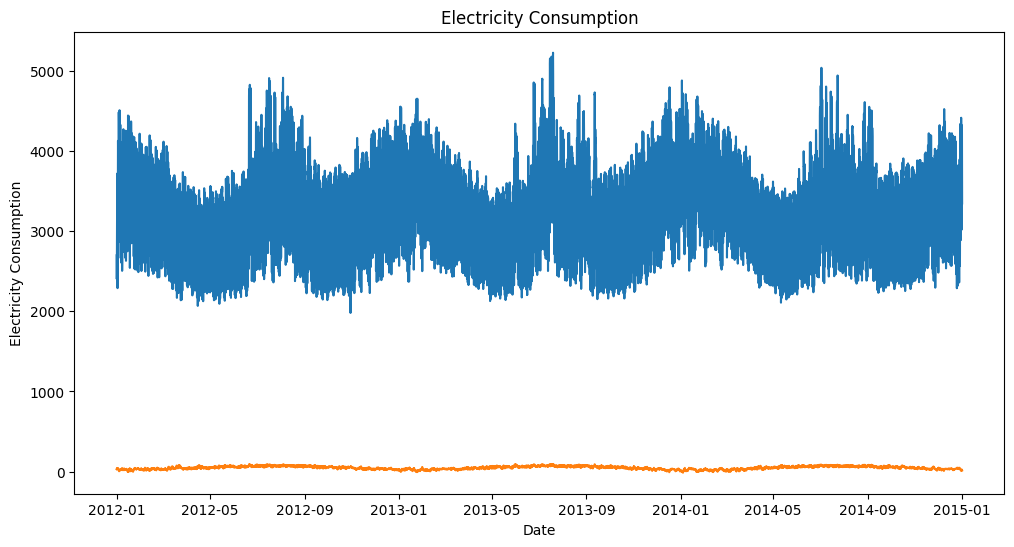

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.title('Electricity Consumption')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.show()

In [21]:
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df[:train_size]
test_data = df[train_size:]

ARIMA model

In [22]:
model = ARIMA(train_data['load'], order=(1, 0, 0))  # ARIMA(p, d, q) order
model_fit = model.fit()

c:\Users\Jibrin\miniconda3\envs\ArewaDS\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Jibrin\miniconda3\envs\ArewaDS\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Jibrin\miniconda3\envs\ArewaDS\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Forecast the electricity load

In [23]:
forecast = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

Visualize the forecast

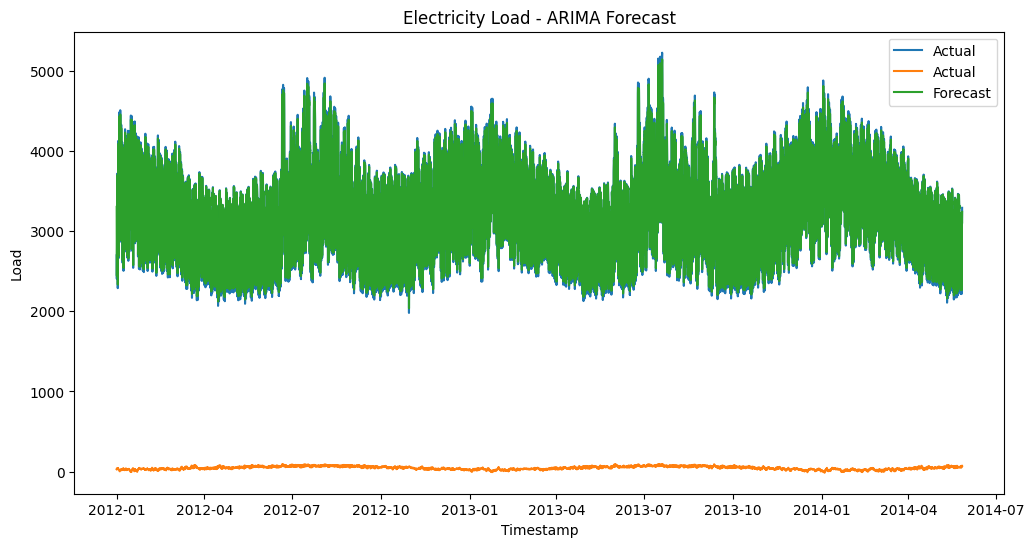

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Actual')
plt.plot(train_data.index, forecast, label='Forecast')
plt.title('Electricity Load - ARIMA Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Load')
plt.legend()
plt.show()